<a href="https://colab.research.google.com/github/karimNafiz/kaggle_competition_comp432/blob/main/competition_entry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
# load the data for analysis
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(29755, 502)

In [ ]:
df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,label
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.063888,43.0
1,1,0.000000,0.000000,0.000000,0.071982,0.000000,0.000000,0.000000,0.071982,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071982,0.0,0.000000,16.0
2,2,0.111111,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,...,0.000000,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,21.0
3,3,0.000000,0.087039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087039,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2.0
4,4,0.000000,0.000000,0.069673,0.000000,0.069673,0.000000,0.069673,0.000000,0.000000,...,0.069673,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0


In [ ]:
# need to check for null values
df.isnull().sum()

,0
id,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
...,...
feature_496,1
feature_497,1
feature_498,1
feature_499,1


In [ ]:
# seems like, at max for a single columnn we have one null value
df.isnull().sum().max()

1

In [ ]:
# lets check total null values
df.isnull().sum().sum()

np.int64(276)

In [ ]:
# we basically have 276 null values
# at best (approximation) we will loose 276/ df.shape[0]

In [ ]:
approx_loss_ratio = df.isnull().sum().sum()/df.shape[0]

In [ ]:
# the worst case approx loss ratio is very small we can happily get rid of these values
approx_loss_ratio

np.float64(0.009275751974458074)

In [ ]:
# defining a function to calculate bin size for distributions
# there are different fking formulas for calculating good bin sizes
# look it up
def get_bin_size(row_count):
  return np.ceil(np.log2(row_count) + 1)

In [ ]:
get_bin_size(df.shape[0])

np.float64(16.0)

In [ ]:
row_count = df.shape[0]

In [ ]:
row_count

29755

<Axes: >

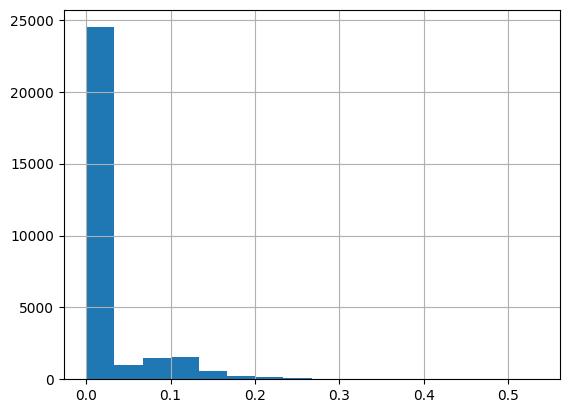

In [ ]:
df['feature_0'].hist(bins=int(get_bin_size(row_count)))

<Axes: >

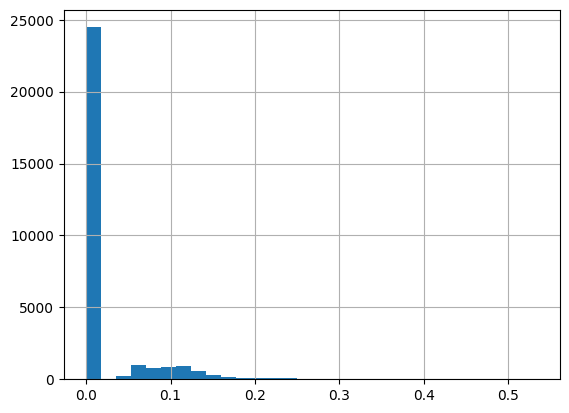

In [ ]:
df['feature_0'].hist(bins=30)

In [ ]:
df[df['feature_0']<=0].shape[0]

24476

In [ ]:
df[df['feature_0']>0].shape[0]

5279

In [ ]:
feat0_great0 = df[df['feature_0']>0]

<Axes: xlabel='label'>

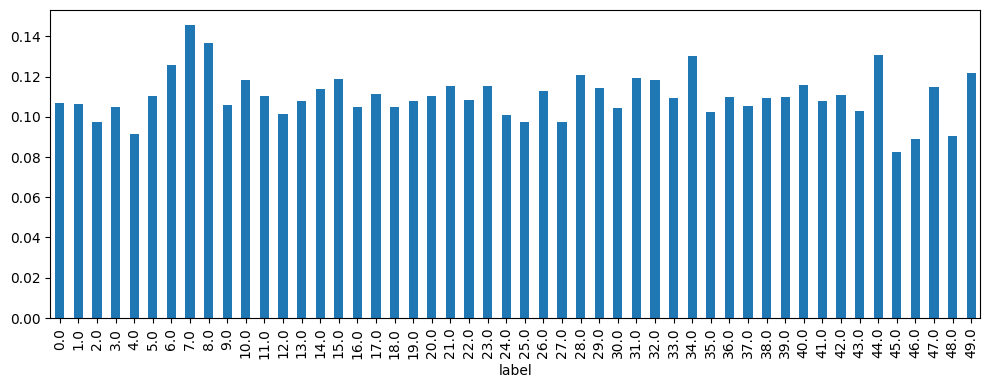

In [ ]:
feat0_great0.groupby("label")['feature_0'].mean().plot(kind='bar', figsize = (12,4))

<Axes: xlabel='label'>

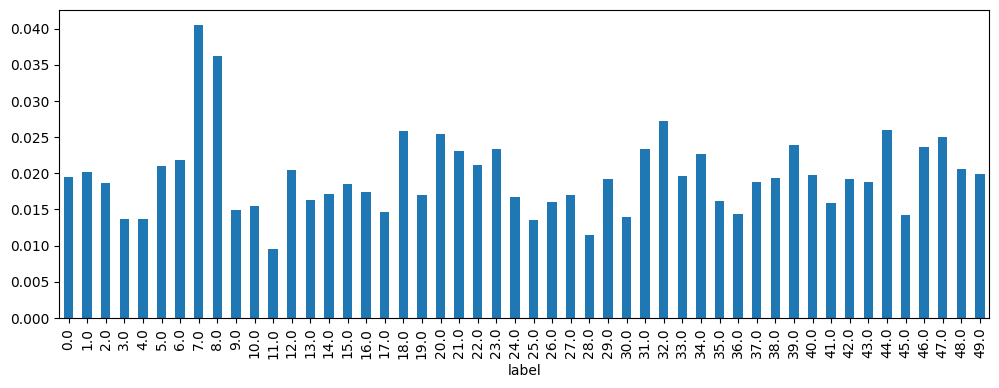

In [ ]:
df.groupby("label")['feature_0'].mean().plot(kind='bar', figsize = (12,4))

In [ ]:
num_features = df.shape[1]
cols = 5
rows = int(np.ceil(num_features/cols))

plt.figure(figsize=(20, 4 * rows))

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df[col], bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
mask = (df >= 0).all(axis=1)

In [ ]:
df_zero_rows = df[mask]






In [ ]:
df_zero_rows

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,label
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.063888,43.0
1,1,0.000000,0.000000,0.000000,0.071982,0.000000,0.000000,0.000000,0.071982,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.071982,0.0,0.000000,16.0
2,2,0.111111,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,...,0.000000,0.111111,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,21.0
3,3,0.000000,0.087039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087039,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.0
4,4,0.000000,0.000000,0.069673,0.000000,0.069673,0.000000,0.069673,0.000000,0.000000,...,0.069673,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29749,29749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107211,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,24.0
29750,29750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120168,0.000000,0.000000,...,0.000000,0.000000,0.0,0.060084,0.0,0.180253,0.000000,0.0,0.000000,27.0
29751,29751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.124274,0.0,0.000000,0.000000,0.0,0.000000,2.0
29752,29752,0.103695,0.000000,0.000000,0.103695,0.000000,0.103695,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,22.0
